Upload gambar content (foto kamu):


Saving WhatsApp Image 2025-11-25 at 11.28.24_ee0793cb.jpg to WhatsApp Image 2025-11-25 at 11.28.24_ee0793cb (1).jpg
Upload gambar style (lukisan neon):


Saving IMG20230719122009_00.jpg to IMG20230719122009_00 (1).jpg


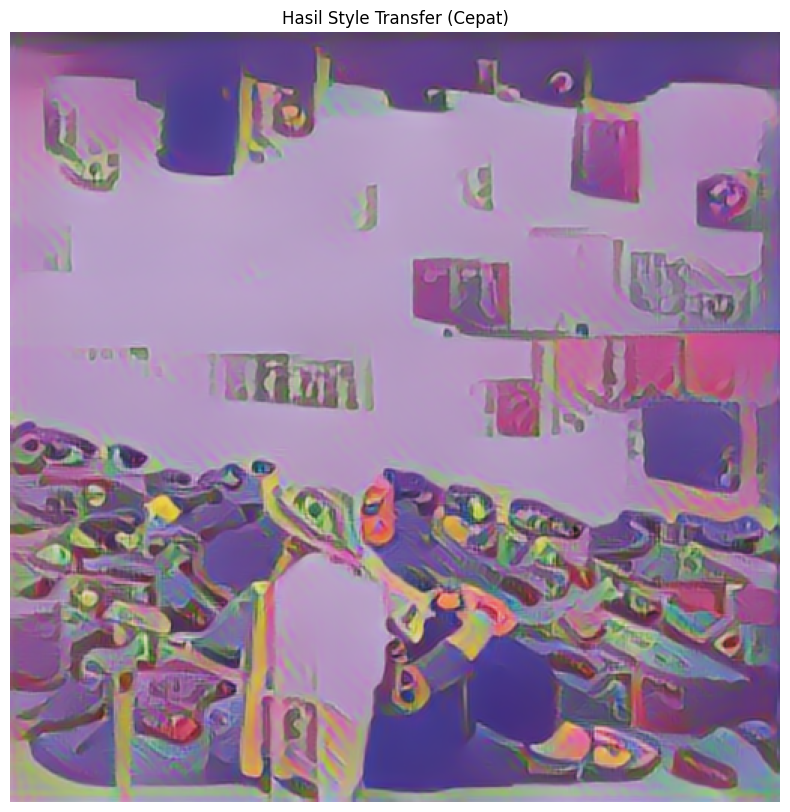

Hasil disimpan sebagai: hasil_style_transfer_cepat.png


In [2]:
# ============================================
# Neural Style Transfer Cepat (Tanpa Training)
# Menggunakan TensorFlow Hub
# ============================================

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# ---- Fungsi Load Image ----
def load_image(img_path, img_size=(512, 512)):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(img_size)
    img = np.array(img)/255.0
    img = img[np.newaxis, ...].astype(np.float32)
    return img

# ---- Upload Content Image ----
print("Upload gambar content (foto kamu):")
uploaded = files.upload()
content_path = list(uploaded.keys())[0]

# ---- Upload Style Image ----
print("Upload gambar style (lukisan neon):")
uploaded2 = files.upload()
style_path = list(uploaded2.keys())[0]

content_image = load_image(content_path)
style_image = load_image(style_path)

# ---- Load Model Cepat dari TensorFlow Hub ----
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# ---- Proses Style Transfer ----
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

# ---- Tampilkan hasil ----
plt.figure(figsize=(10,10))
plt.imshow(stylized_image[0])
plt.axis('off')
plt.title("Hasil Style Transfer (Cepat)")
plt.show()

# ---- Simpan ----
output_name = "hasil_style_transfer_cepat.png"
img_out = tf.image.convert_image_dtype(stylized_image[0], dtype=tf.uint8)
Image.fromarray(img_out.numpy()).save(output_name)

print("Hasil disimpan sebagai:", output_name)
